In [2]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline
import numpy as np
import pandas as pd  
import seaborn as sns 
plt.rcParams['figure.figsize'] = (15, 10)
from mpl_toolkits.mplot3d import Axes3D

In [3]:
data = pd.read_csv('./Univariate-Linear-Regression/data.txt')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


Text(0.5, 1.0, 'Profit vs population')

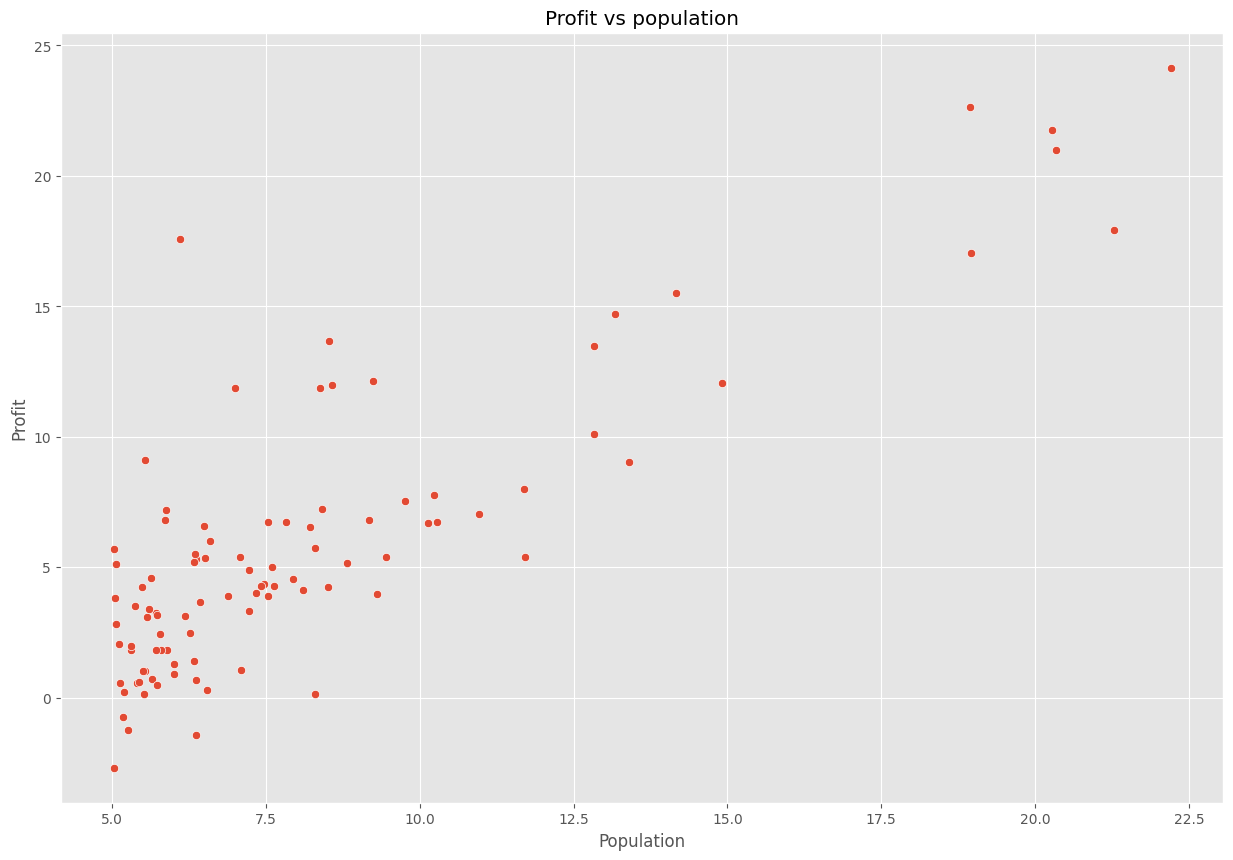

In [4]:
ax=sns.scatterplot(x='Population', y = 'Profit',data=data)
ax.set_title('Profit vs population')

In [5]:
def cost_function(X,y,theta):
    m=len(y)
    y_pred=X.dot(theta)
    error =( y_pred - y) **2
    
    return 1/(2*m) * np.sum(error)
m= data.Population.values.size
X = np.append(np.ones((m,1)),data.Population.values.reshape(m,1),axis=1)
y= data.Profit.values.reshape(m,1)
theta =np.zeros((2,1))
cost_function(X,y,theta)

32.072733877455676

In [6]:
def gradient_descent(X,y,theta,alpha,iterations):
    m=len(y)
    costs=[]
    for i in range(iterations):
        y_pred = X.dot(theta)
        error = np.dot(X.transpose(),(y_pred-y))
        theta -= alpha * 1/m *error
        costs.append(cost_function(X,y,theta))
    return theta,costs
theta, costs = gradient_descent(X,y,theta,alpha=0.01,iterations=2000)
print("h(x) = {} + {}x1".format(str(round(theta[0,0],2)),
                               str(round(theta[1,0],2))))

h(x) = -3.79 + 1.18x1


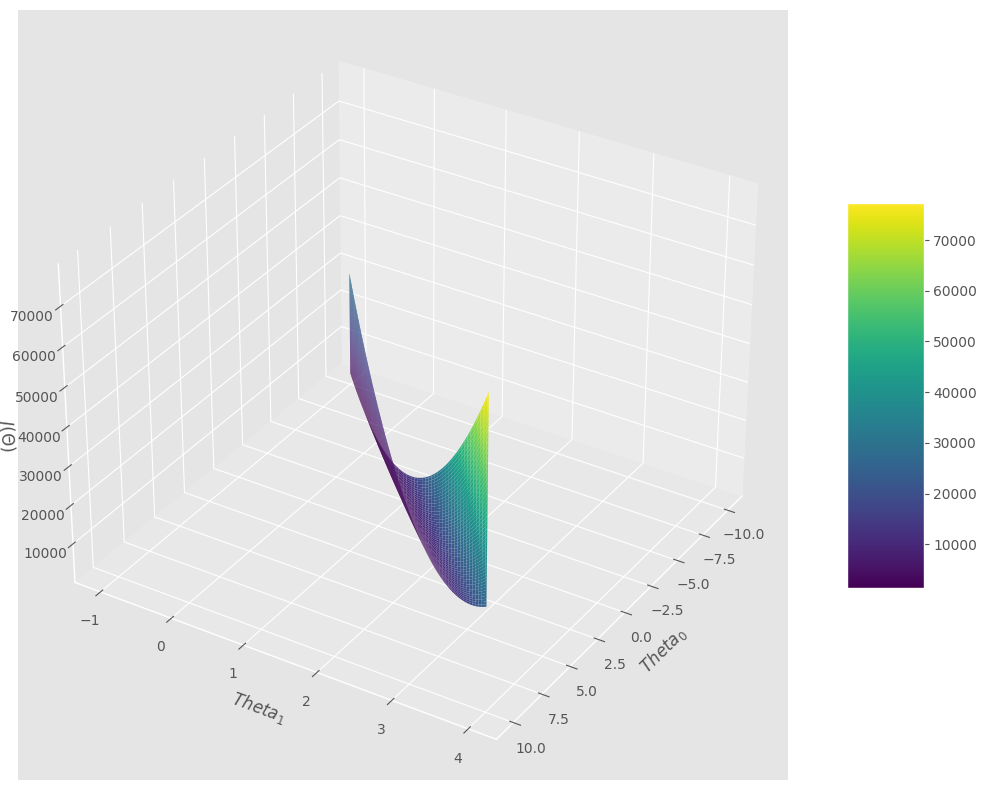

In [8]:
theta_0 = np.linspace(-10,10,100)
theta_1 = np.linspace(-1,4,100)
cost_values = np.zeros((len(theta_0),len(theta_1)))
for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        t=np.array([theta_0[i],theta_1[j]])
        cost_values[i,j]= cost_function(X,y,t)
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(theta_0,theta_1,cost_values,cmap='viridis')
fig.colorbar(surf,shrink=0.5, aspect =5)
plt.xlabel('$\ Theta_0$')
plt.ylabel('$\ Theta_1$')
ax.set_zlabel('$J(\Theta)$')
ax.view_init(32,32)
plt.show()

Text(0, 0.5, '$J(\\Theta)$')

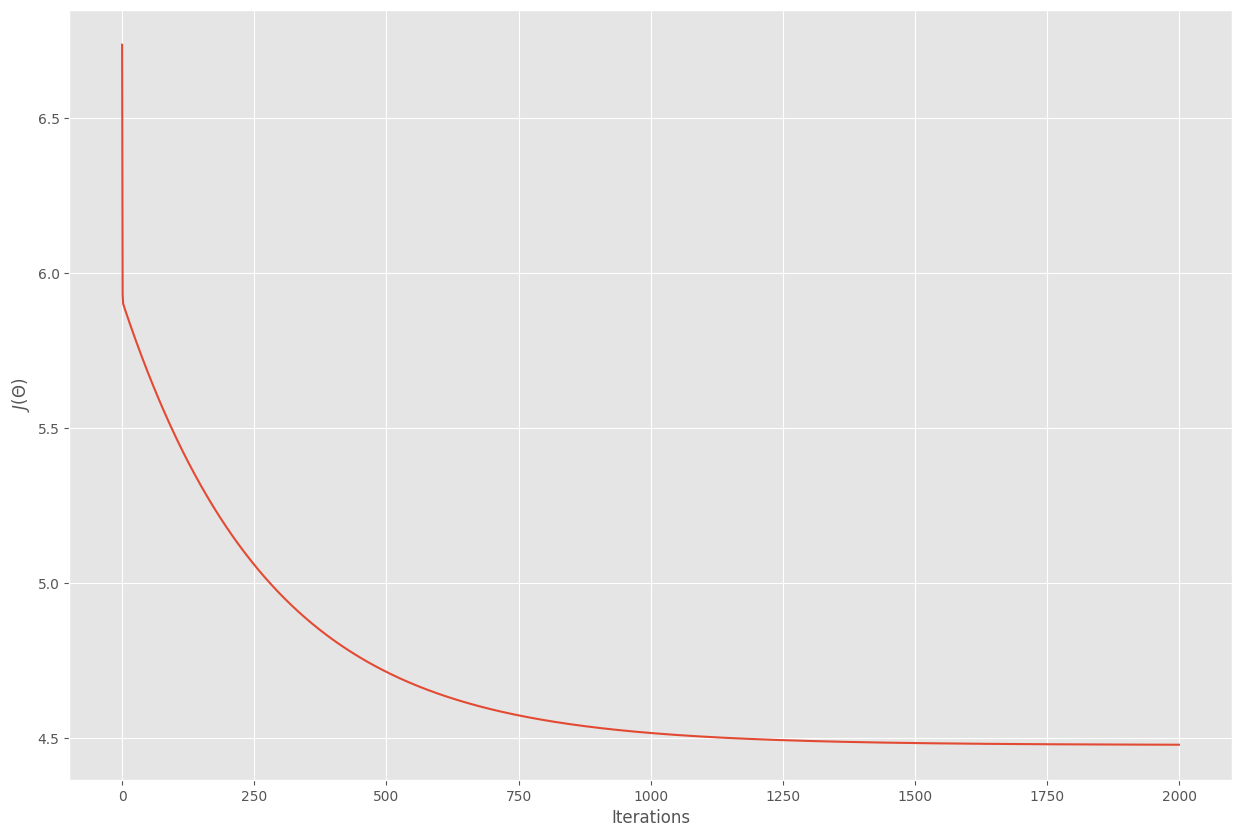

In [9]:
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('$J(\Theta)$')

Text(0.5, 1.0, 'Linear Regression Fit')

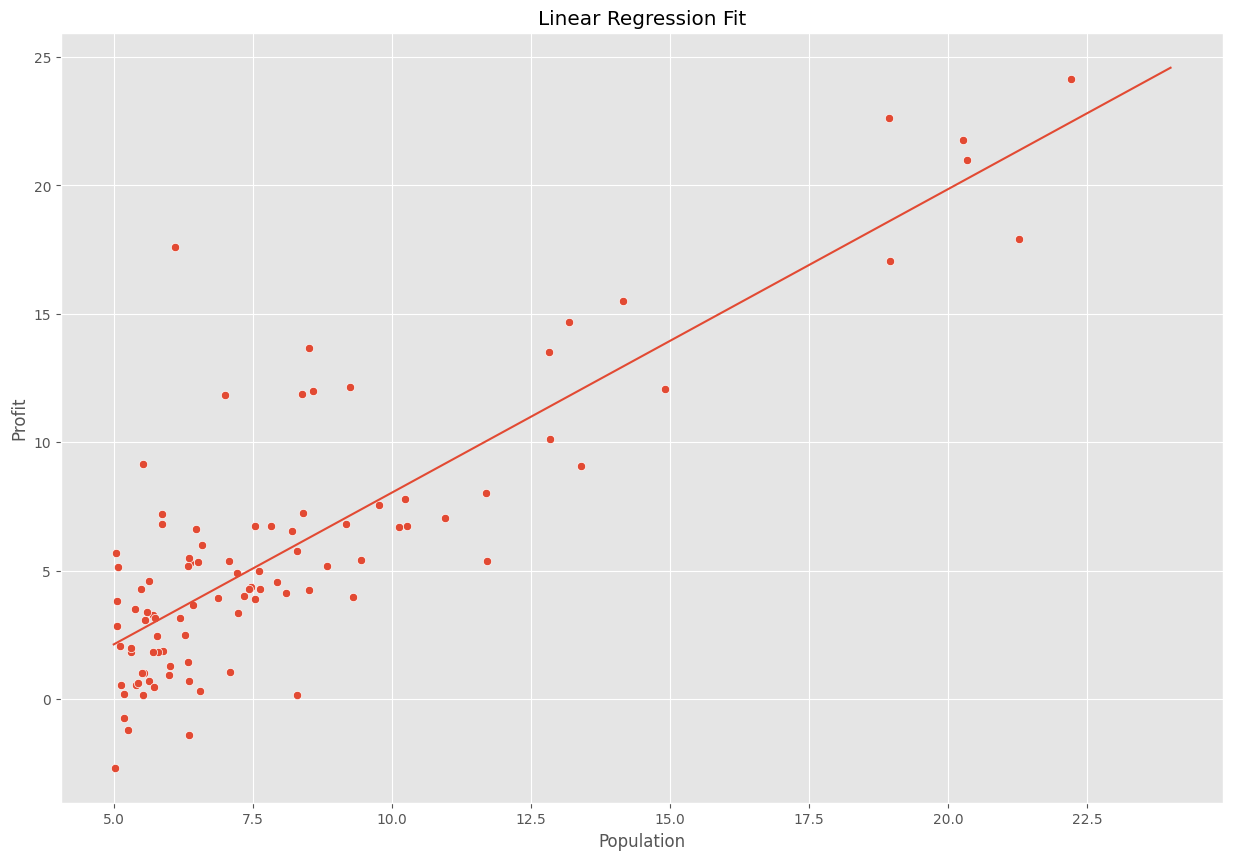

In [15]:
theta = np.squeeze(theta)
sns.scatterplot(x='Population',y='Profit',data=data)
x_value = [x for x in range(5,25)]
y_value = [(x* theta[1] + theta[0]) for x in x_value]
sns.lineplot(x=x_value,y=y_value)
plt.xlabel('Population')
plt.ylabel('Profit')
plt.title('Linear Regression Fit')